Topic: Predicting success of bank telemarketing
Outline:
- Data preparation
- Data exploration
- Data processing


In [ ]:
#sample bank
!gdown 1Vp2_3QTf3NP4o0BeqFZ3kfexcVPnWwXO
#bank full
!gdown 12Kzja-zv40R45xL5uZYfFyQJPk_713hA

Downloading...
From: https://drive.google.com/uc?id=1Vp2_3QTf3NP4o0BeqFZ3kfexcVPnWwXO
To: /content/bank-additional.csv
100% 584k/584k [00:00<00:00, 85.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Kzja-zv40R45xL5uZYfFyQJPk_713hA
To: /content/bank-additional-full.csv
100% 5.83M/5.83M [00:00<00:00, 240MB/s]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

DATA 

A description of the dataset lists the attributes and their descriptions:

**Customers Attributes**
* age (numeric)
* job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
* marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
* education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
* default: has credit in default? (categorical: "no","yes","unknown")
* housing: has housing loan? (categorical: "no","yes","unknown")
* loan: has personal loan? (categorical: "no","yes","unknown")

**Last Telephone Contact**
* contact: contact communication type (categorical: "cellular","telephone")
* month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
* day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other Attributes**
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

**Social and Economic Context**
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric)
* cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Calculate the success rate of current and previous campaign**

In [ ]:
poutcomes = df[df.poutcome != 'nonexistent'].poutcome.apply(lambda x: 1 if x == 'success' else 0)
coutcomes = df.y.apply(lambda x: 1 if x == 'yes' else 0)

print('Number of records:', len(df))
print('Success Rate (Current Campaign):', coutcomes.sum() / len(df))
print('Success Rate (Previous Campaign):', poutcomes.sum() / len(poutcomes))

Number of records: 41188
Success Rate (Current Campaign): 0.11265417111780131
Success Rate (Previous Campaign): 0.24408888888888888


11.2% response rate in the population. Apply stratified sampling to preserve the distribution in test and training sets. 
The data are ordered by date so we'll need to first shuffle the dataset rather than simply splitting it.

In [ ]:
#Suffle data and splitting data
X, y = df.drop('y', axis=1), df.y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y, shuffle=True, test_size=.2)

In [ ]:
#Summarize the training data set after suffling
print('Number of training records:', len(X_train))
print('Training proportions:\n\n', y_train.value_counts() / len(y_train))

Number of training records: 32950
Training proportions:

 no     0.887344
yes    0.112656
Name: y, dtype: float64


In [ ]:
#Summerize the test dataset after suffling
print('Number of test records:', len(X_test))
print('Training proportions:\n\n', y_test.value_counts()/len(y_test))

Number of test records: 8238
Training proportions:

 no     0.887351
yes    0.112649
Name: y, dtype: float64


In [ ]:
#Saving the training and test datasets
#Saving the test datasets
df_test = pd.concat([X_test, y_test], axis=1)
print('Test dataset shape:', df_test.shape)
df_test.to_csv('explore_test.csv', sep=',', index=False)

Test dataset shape: (8238, 21)


In [ ]:
#Saving the training datasets
df_train = pd.concat([X_train, y_train], axis =1)
print('Train dataset shape:', df_train.shape)
df_train.to_csv('explore_train.csv', sep= ',', index = False)

Train dataset shape: (32950, 21)


In [ ]:
df_train.dtypes.groupby(df_train.dtypes).size()

int64       5
float64     5
object     11
dtype: int64

In [ ]:
dtypes = pd.DataFrame(df_train.dtypes.rename('type')).reset_index().astype('str')
# Exclude duration since it is a leaky variable
dtypes = dtypes.query('index != "duration"')
numeric = dtypes[(dtypes.type.isin(['int64', 'float64'])) & (dtypes['index'] != 'duration')]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric)) & (dtypes['index'] != 'y')]['index'].values

print('Numeric:\n', numeric)
print('Categorical:\n', categorical)

Numeric:
 ['age' 'campaign' 'pdays' 'previous' 'emp.var.rate' 'cons.price.idx'
 'cons.conf.idx' 'euribor3m' 'nr.employed']
Categorical:
 ['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome']


**DATA EXPLORATION**

Distribution of Class variable

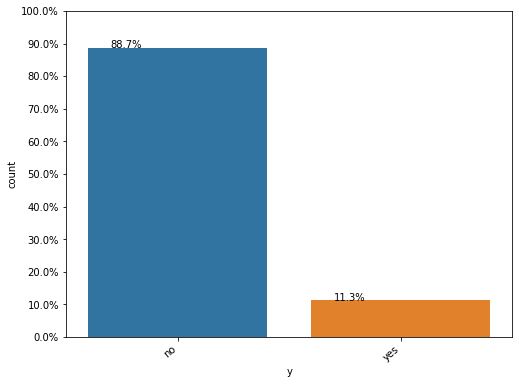

In [ ]:
plt.figure(figsize=(8,6))
Y = df["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=df)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

CATEGORICAL DATA ANALYSIS

In [ ]:
#Data preparation
df_train[categorical].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

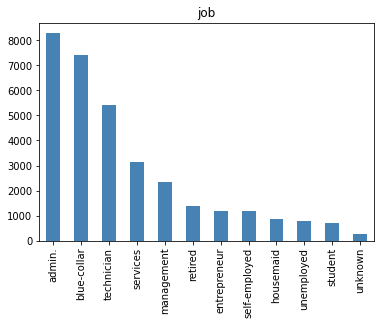

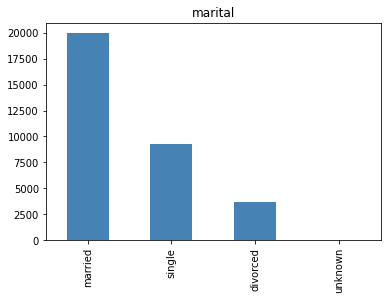

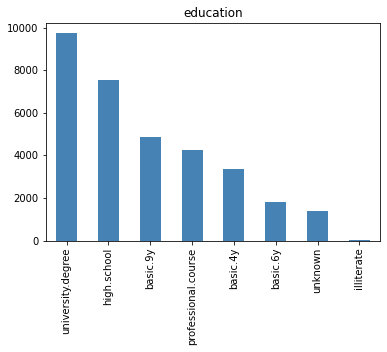

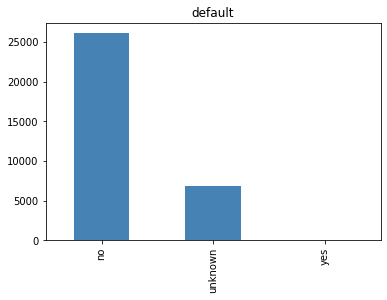

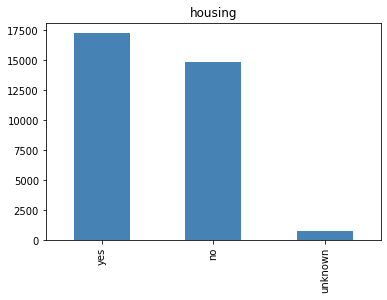

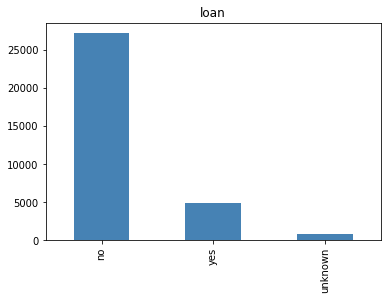

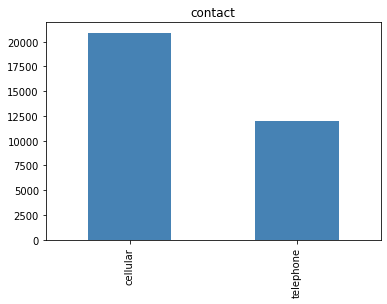

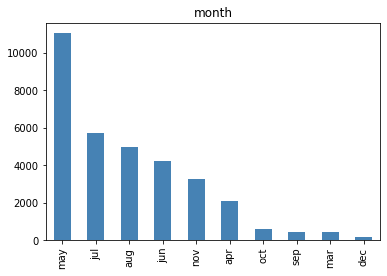

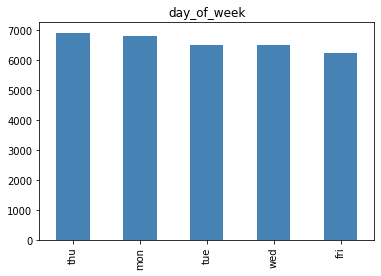

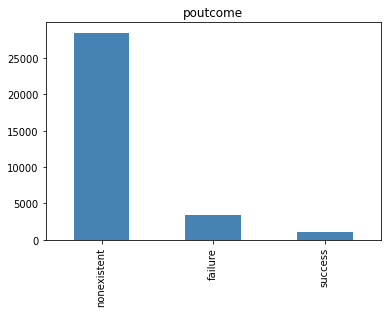

In [ ]:
for attr in categorical:
  plt.figure()
  df_train[attr].value_counts().plot(kind='bar', color='steelblue');
  plt.title(attr);

* There are fewer "non-traditional" jobs that could be merged if support is * too low to be valuable
* The bank has a good understanding of marital status
* No or very few customers are illiterate
* No or very few customers who have defaulted on a loan, assumed that the bank probably does not want to extend an offer to customers with bad credit
* Similar proportions of customers with and without housing loans
* Few customers have personal loans
* Almost double as many mobile phones as landline phone calls
* Fewer calls made in the second half of the year
* Calls are uniform accross days of the week
* Some customers were already contacted previously by the bank but many were never contacted at all

Support (job)

admin.           8279
blue-collar      7430
technician       5419
services         3155
management       2351
retired          1362
entrepreneur     1173
self-employed    1162
housemaid         861
unemployed        800
student           697
unknown           261
Name: job, dtype: int64 

Support (marital)

married     19925
single       9287
divorced     3668
unknown        70
Name: marital, dtype: int64 

Support (education)

university.degree      9722
high.school            7546
basic.9y               4860
professional.course    4234
basic.4y               3365
basic.6y               1815
unknown                1393
illiterate               15
Name: education, dtype: int64 

Support (default)

no         26089
unknown     6858
yes            3
Name: default, dtype: int64 

Support (housing)

yes        17259
no         14906
unknown      785
Name: housing, dtype: int64 

Support (loan)

no         27203
yes         4962
unknown      785
Name: loan, dtype: int64 

Sup

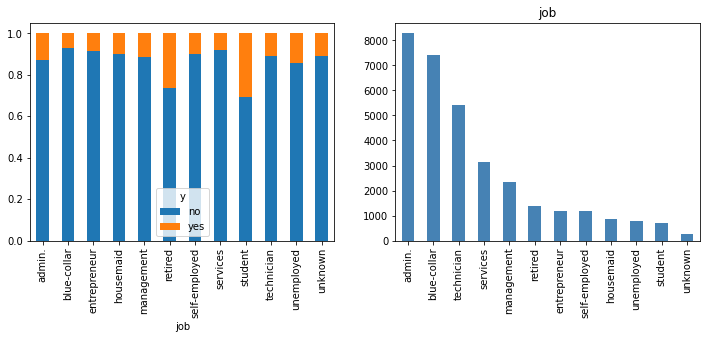

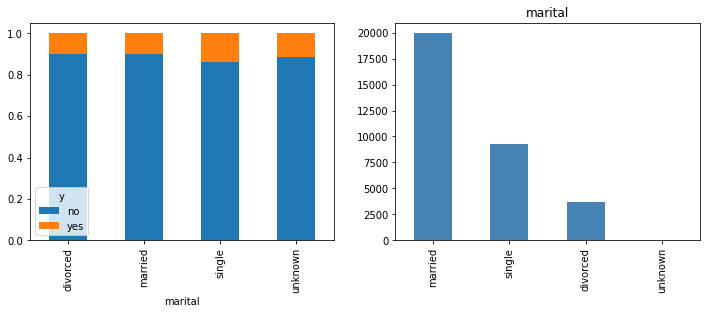

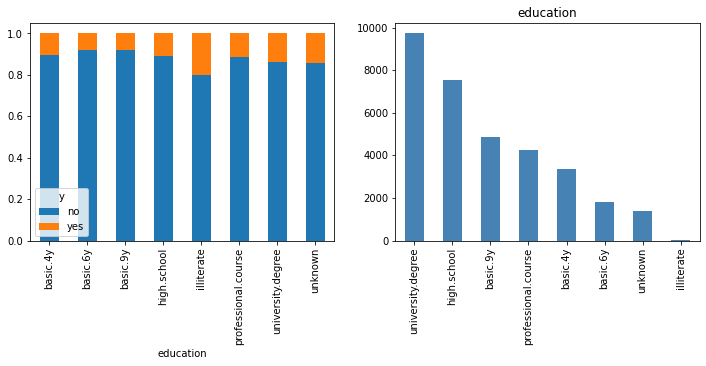

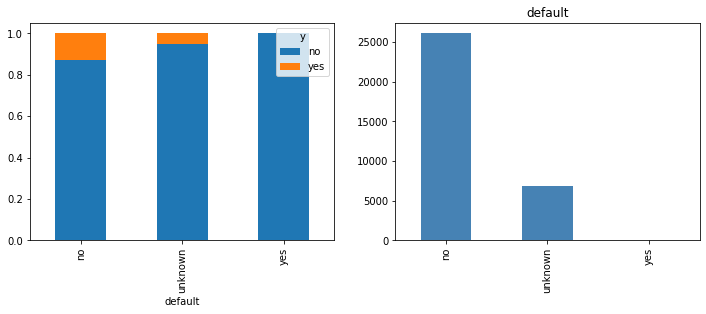

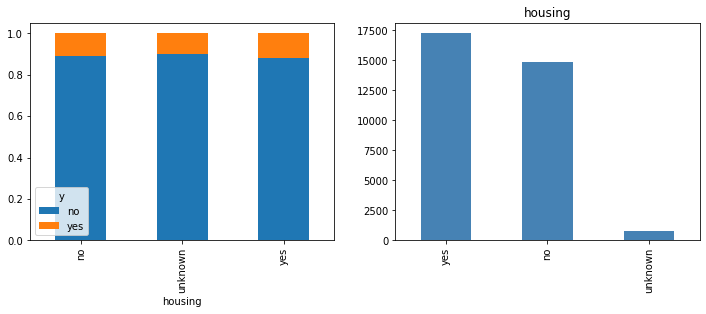

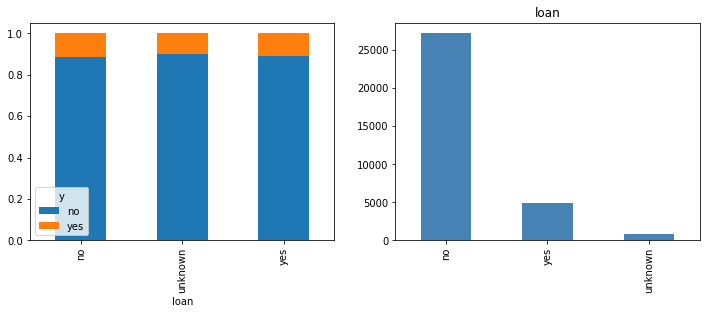

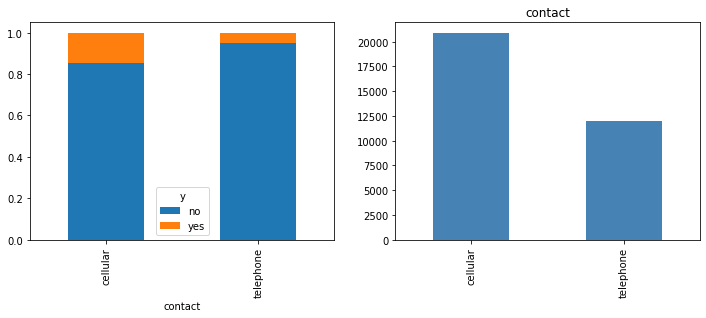

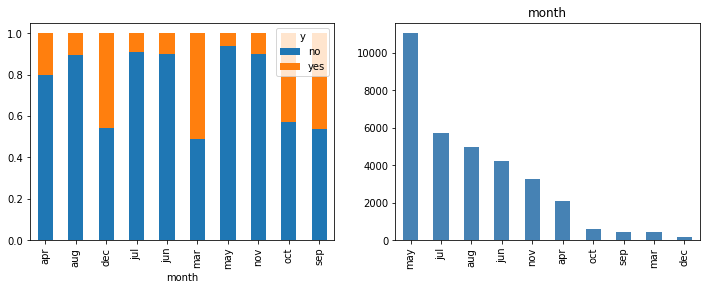

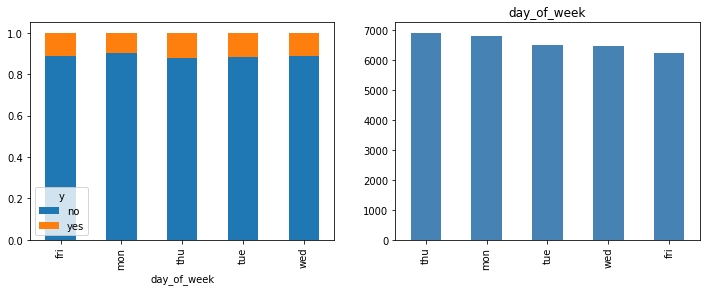

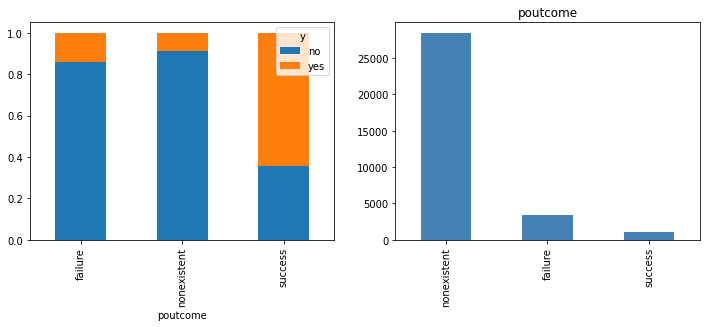

In [ ]:
for attr in categorical:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  outcome_counts = df_train.groupby([attr, 'y']).size().rename('count').reset_index()
  by_outcome = outcome_counts.pivot(columns='y', values='count', index=attr)
  # Plot the proportions
  by_outcome.div(by_outcome.sum(1), axis=0).plot.bar(stacked=True, ax=ax1);
  # Plot the counts
  df_train[attr].value_counts().plot.bar(ax=ax2, legend=False,color='steelblue');
  print('Support (%s)\n' % attr)
  print(df_train[attr].value_counts(), '\n')
  plt.title(attr);

* Customers with *retired, student, and unemployed* values tend to respond more and have lower support.
* *Marital* status isn't very predictive of outcome
* *Illiterate* customers have a noticably higher response rate but there are few of them
* Has credit in default (*Default*) appears to have predictive power (large proportion of 'no' instances)
* *Contact* (phone/landline phone) medium appears to have good predictive power - nearly 4x increase in conversion rate for customers who were contacted on their mobile phone
month of contact appears to be predictive but low support for months with higher response rates
* Nearly the same for everyday, So *day_of_week* doesn't appear to be very informative
* If customers were contacted at least once before, they are more likely to convert (regardless of whether the last call was a success or failure)

**NUMERICAL DATA ANALYSIS**

In [ ]:
df_train[numeric].isnull().sum()

age               0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

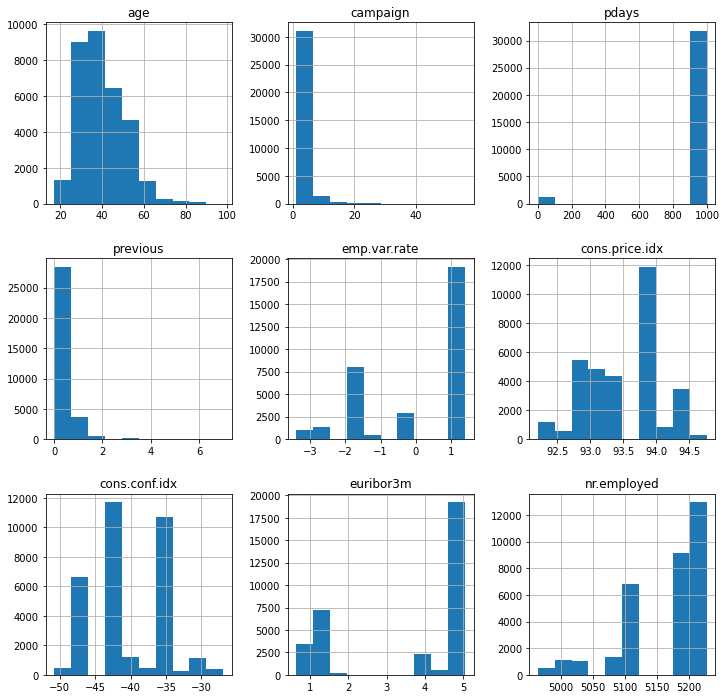

In [ ]:
df_train[numeric].hist(figsize=(12,12));

In [ ]:
df_train[numeric].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.048983,2.567648,962.414021,0.173080,0.079347,93.573330,-40.497939,3.618948,5166.964003
std,10.447702,2.778174,187.064504,0.497709,1.571305,0.579098,4.636680,1.734956,72.220794
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


* Cleary some outliers who are very old - are they really representative of the popuplation or will they skew the results? Conversely, are the outliers informative of the outcome?
* The rest of the distributions except for campaign and previous are sparse
* The number of calls (*previous*) to that customers could be treated as a discrete variable

The fact that a majority of instances have a *pdays* (number of days that passed by after the client was last contacted from a previous campaign) value of 999 (missing) is going to be problematic if we want to use the attribute as a model feature. Since so few instances have an associated pdays, we could remove it from the analysis and modelling process. We could also simply add an indicator that indicates whether or not a customer was previously contacted.

What does the distribution of pdays look like without missing instances?

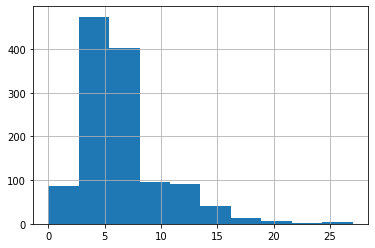

In [ ]:
pdays = df_train.loc[df_train.pdays != 999, ['pdays', 'y']]
pdays.pdays.hist();

In [ ]:
#To check whether missing value informative
pdays_999 = df_train.query('pdays == 999')
pdays_999.groupby('y').size() / len(pdays_999)

y
no     0.907235
yes    0.092765
dtype: float64

In [ ]:
pdays.groupby('y').size() / len(pdays)

y
no     0.367381
yes    0.632619
dtype: float64

The response rate is significantly higher for customers with an associated pdays value (they were previously contacted). Customers who were previously contacted are seven times more likely to convert than customers without an associated value. It could be that these customers were previously contacted because it was already found that they had higher response rates / the previous campaign might have leveraged a similar predictive model to identify which customers to contact.

Evaluate the correlation between bank numeric attributes using Spearman rank correlation since the data isn't normal.

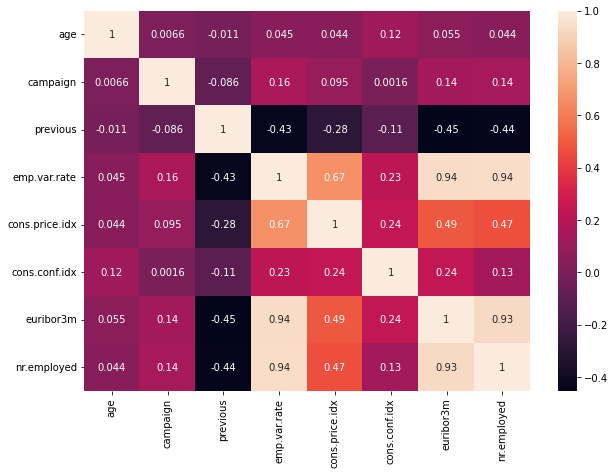

In [ ]:
plt.figure(figsize=(10,7));
sns.heatmap(df_train[numeric].drop('pdays', axis=1).corr('spearman'), annot=True);

Based on this correlation, strongest correlations are between the socioeconomic attributes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

<Figure size 432x288 with 0 Axes>

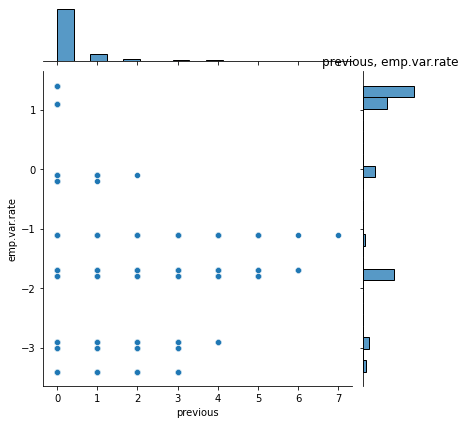

<Figure size 432x288 with 0 Axes>

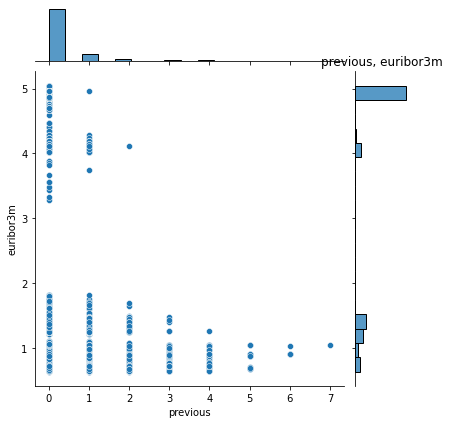

<Figure size 432x288 with 0 Axes>

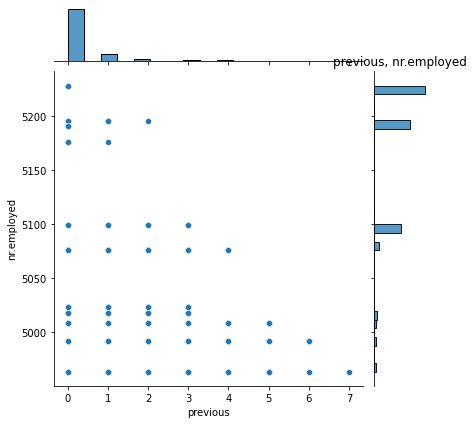

<Figure size 432x288 with 0 Axes>

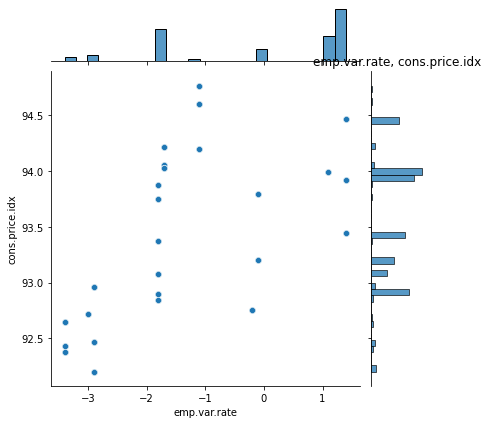

<Figure size 432x288 with 0 Axes>

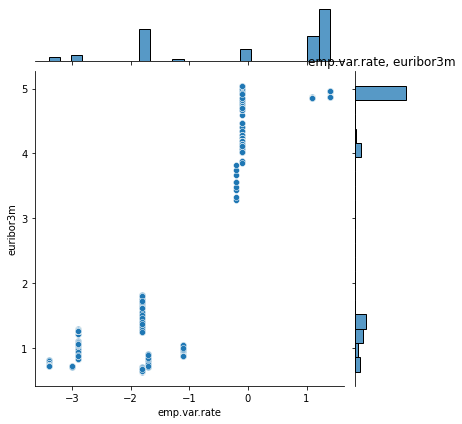

<Figure size 432x288 with 0 Axes>

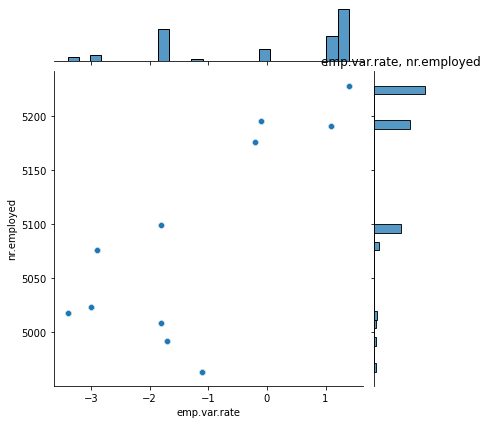

<Figure size 432x288 with 0 Axes>

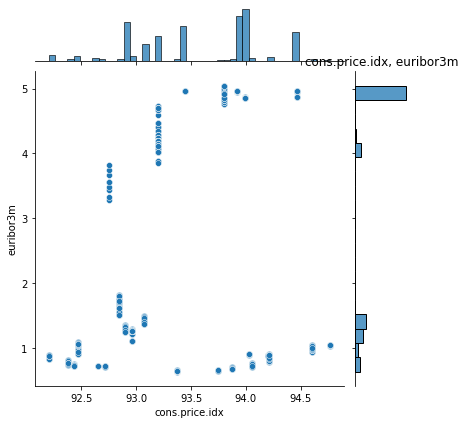

<Figure size 432x288 with 0 Axes>

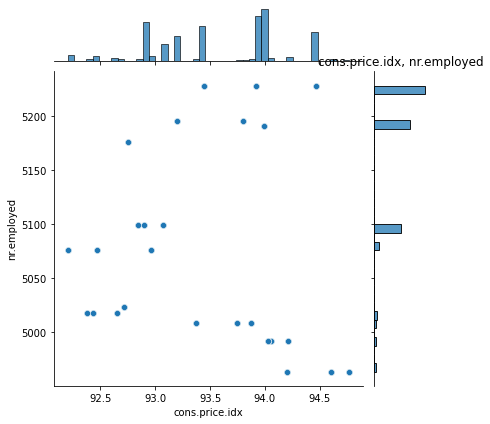

<Figure size 432x288 with 0 Axes>

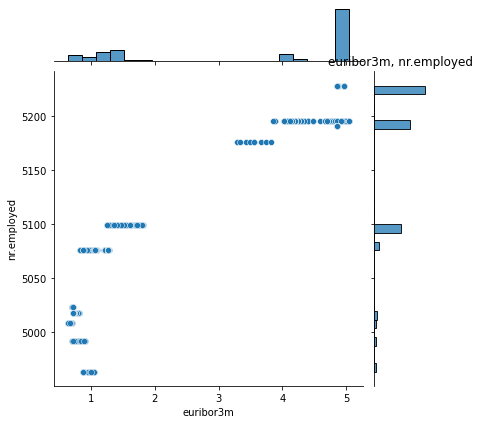

In [ ]:
signif_corrs = [
  ('previous', 'emp.var.rate'),
  ('previous', 'euribor3m'),
  ('previous', 'nr.employed'),
  ('emp.var.rate', 'cons.price.idx'),
  ('emp.var.rate', 'euribor3m'),
  ('emp.var.rate', 'nr.employed'),
  ('cons.price.idx', 'euribor3m'),
  ('cons.price.idx', 'nr.employed'),
  ('euribor3m', 'nr.employed')
]

for x, y in signif_corrs:
  plt.figure();
  sns.jointplot(df_train[x], df_train[y]);
  plt.title('%s, %s' % (x, y));

Corerlations between socioeconmic and previous (number of contact in previous marketing) variables are not meaningful but correlations between socioeconmic attributes are, especially between:

* emp.var.rate (employment variation rate) and cons.price.idx (consumer price index)
* emp.var.rate and euribor3m (euriboro 3 month rate)
* emp.var.rate and nr.employed (number of employees)
* nr.employed and euribor3m

We'll need to determine which variables are most predictive as features and drop the less predictive features to eliminate multicollinearity.

**Customer Attributes**

In [ ]:
cust_attrs = ['age', 'campaign', 'previous', 'y']

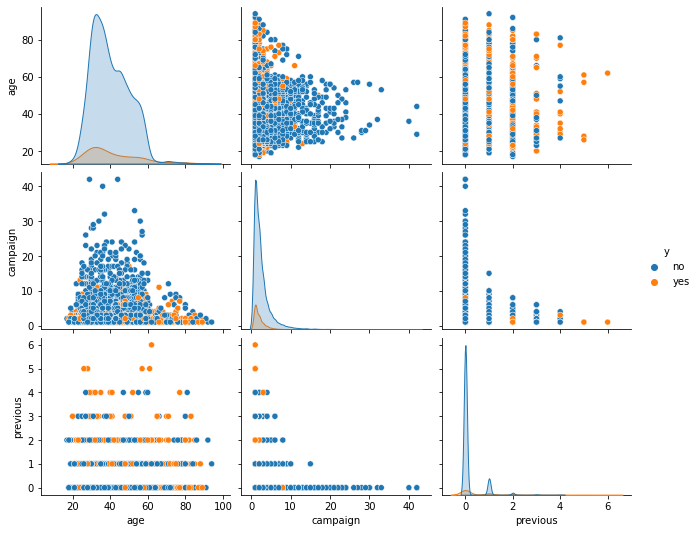

In [ ]:
numeric_outcome = pd.concat([df_train[numeric], df_train['y']], axis=1)
sns.pairplot(numeric_outcome[cust_attrs].sample(n=10000), hue='y', aspect=1.2);

Between the ages of 18 and ~62, customers who were contacted more than ten times were not likely to respond to the campaign. 
So I will find out whether customers that were contacted less than 10 times more likely to convert

In [ ]:
campaign_lt10 = df_train[df_train.campaign < 10]
campaign_lt10.groupby('y').size() / len(campaign_lt10)

y
no     0.885293
yes    0.114707
dtype: float64

In [ ]:
campaign_gte10 = df_train[df_train.campaign >= 10]
campaign_gte10.groupby('y').size() / len(campaign_gte10)

y
no     0.962372
yes    0.037628
dtype: float64

So customers who were contacted less than 10 times were nearly 4x more likely to convert.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


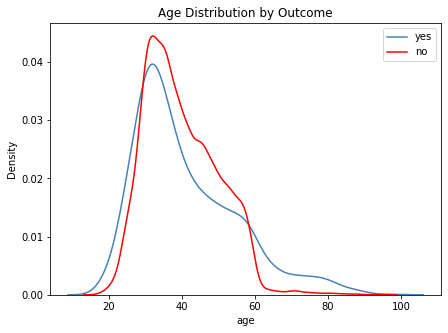

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(numeric_outcome.loc[numeric_outcome.y == 'yes', 'age'], hist=False, color='steelblue', label='yes');
sns.distplot(numeric_outcome.loc[numeric_outcome.y == 'no', 'age'], hist=False, color='red', label='no');
plt.legend();
plt.title('Age Distribution by Outcome');

Younger and older customers tend to convert more than middle-aged customers, presumably because they are looking to build savings and are looking to invest capital, respectively.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


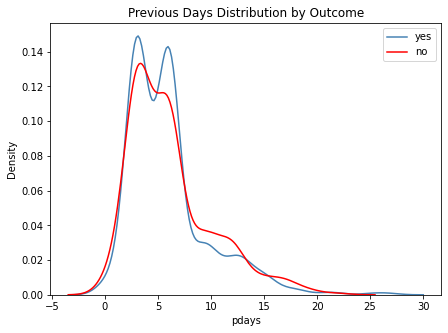

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(pdays.loc[pdays.y == 'yes', 'pdays'], hist=False, color='steelblue', label='yes');
sns.distplot(pdays.loc[numeric_outcome.y == 'no', 'pdays'], hist=False, color='red', label='no');
plt.legend();
plt.title('Previous Days Distribution by Outcome');

In [ ]:
pdays_resp_rates = (pdays.groupby('pdays').y.value_counts() / pdays.groupby('pdays').size()).rename('rate').reset_index()
pdays_pos_rates = pdays_resp_rates.query('y == "yes"').sort_values('rate', ascending=False)
pdays_pos_rates

,pdays,y,rate
46,27,yes,1.000000
45,26,yes,1.000000
44,25,yes,1.000000
41,21,yes,1.000000
26,13,yes,0.785714
30,15,yes,0.722222
0,0,yes,0.692308
12,6,yes,0.686217
6,3,yes,0.675362
36,18,yes,0.666667


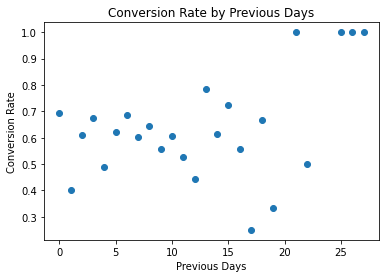

In [ ]:
plt.scatter(pdays_pos_rates.pdays, pdays_pos_rates.rate)
plt.title('Conversion Rate by Previous Days');
plt.xlabel('Previous Days');
plt.ylabel('Conversion Rate');

There is nothing especially informative about the pdays attribute since values are randomly distributed about the conversion rate. Conversion rates are both higher and lower after ~15 days.

**Social and Economic Context Attributes**

A consideration for the socioeconomic variables is that they are computed over different frequencies e.g. quarterly, monthly, daily.

In [ ]:
soc_attrs = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

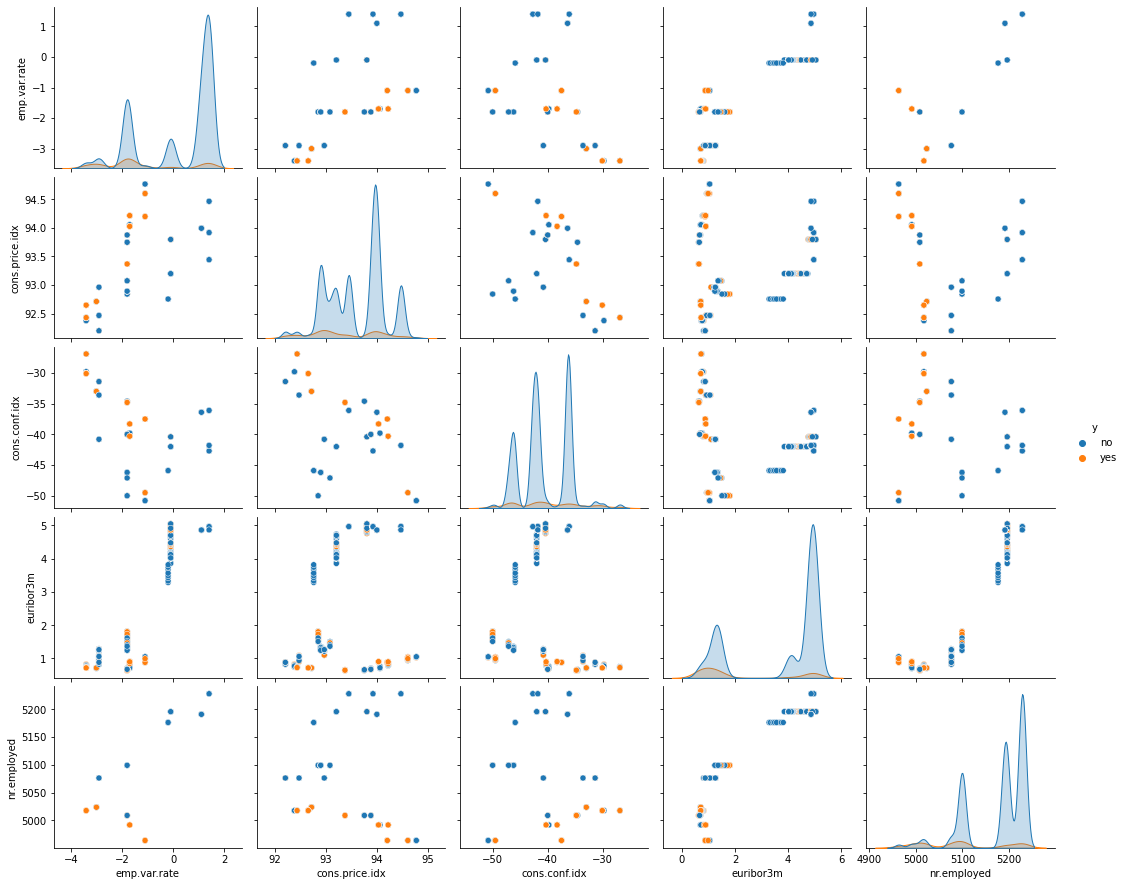

In [ ]:
soc_ec = pd.concat([df_train[soc_attrs], df_train['y']], axis=1)
sns.pairplot(soc_ec, hue='y', aspect=1.2);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

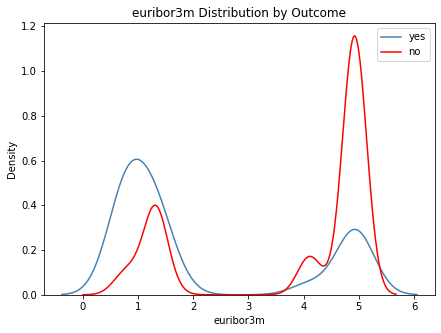

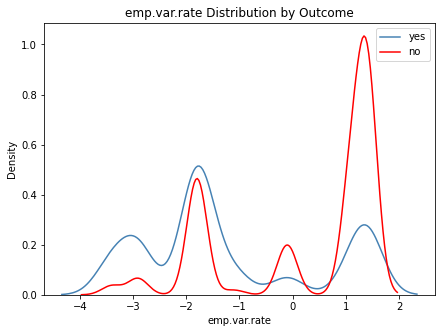

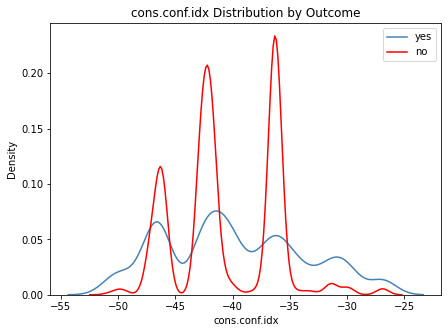

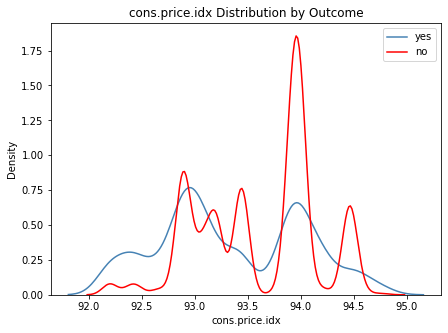

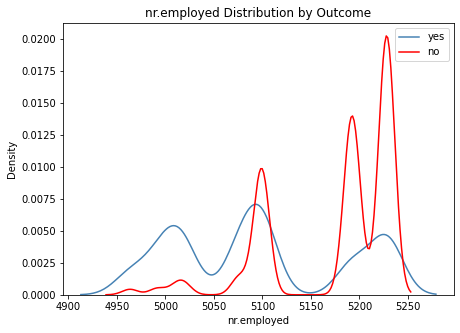

In [ ]:
for c in set(soc_ec.columns) - set('y'):
  plt.figure(figsize=(7,5))
  sns.distplot(soc_ec.loc[soc_ec.y == 'yes', c], hist=False, color='steelblue', label='yes');
  sns.distplot(soc_ec.loc[soc_ec.y == 'no', c], hist=False, color='red', label='no');
  plt.legend();
  plt.title('%s Distribution by Outcome' % c);

Customers are more likely to convert when:
* The employment variation rate is low
* Euribor 3-month rate is low
* Consumer confidence index is low or high
* Consumer price index is high
* Number of employees is low
* All of these attributes appear to be informative since the campaign response rate varries across their ranges of values

**DATA PREPROCESSING**

In [ ]:
data = pd.read_csv('bank-additional.csv', sep=';')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

DEALING WITH MISSING DATA

There are no missing values in this dataset

DEALING WITH DUPLICATE DATA

In [ ]:
data_dup = data[data.duplicated(keep = "last")]
if data_dup.shape[0] > 0:
  data = data.drop_duplicates()

Separate independent and target variables

In [ ]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (4119, 20)
Shape of Y: (4119,)


Train Test Split

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Test:", y_test.shape)

X Train: (3295, 20)
X Test: (824, 20)
Y Train: (3295,)
Y Test: (824,)


In [ ]:
# Replace "no" with 0 and "yes" with 1

y_train.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

ENCODING CATEGORICAL FEATURES

One Hot Encoding Categorical Features

In [ ]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#add the one hot encoded to the dataframe
def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    df[colname] = sparse[:, i].toarray().ravel().tolist()
  
  return df
#take the columns names iteratively and encode the features
def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset 
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)

In [ ]:
OneHotEncoder(categorical_cols, X_train, X_test, None, False)

# Drop the categorical features as the one hot encoded representation is present
X_train_ohe = X_train.drop(categorical_cols, axis=1)
X_test_ohe = X_test.drop(categorical_cols, axis=1)

Encoding for feature:  job
Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Encoding for feature:  day_of_week
Encoding for feature:  poutcome


In [ ]:
X_train_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 1977 to 1798
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            3295 non-null   int64  
 1   duration                       3295 non-null   int64  
 2   campaign                       3295 non-null   int64  
 3   pdays                          3295 non-null   int64  
 4   previous                       3295 non-null   int64  
 5   emp.var.rate                   3295 non-null   float64
 6   cons.price.idx                 3295 non-null   float64
 7   cons.conf.idx                  3295 non-null   float64
 8   euribor3m                      3295 non-null   float64
 9   nr.employed                    3295 non-null   float64
 10  job_admin.                     3295 non-null   int64  
 11  job_blue-collar                3295 non-null   int64  
 12  job_entrepreneur               3295 non-null 